In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [31]:
# Load the Google datasets
google_train = pd.read_csv('C:\\Users\\Asus\\Downloads\\datasetsandcodefilesstockmarketprediction\\Google_train_data.csv')
google_test = pd.read_csv('C:\\Users\\Asus\\Downloads\\datasetsandcodefilesstockmarketprediction\\Google_test_data.csv')

In [32]:
# Data exploration for Google training data
print("Google Train Data Info:")
print(google_train.info())
print("\nGoogle Train Data Head:")
print(google_train.head())

Google Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB
None

Google Train Data Head:
       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800


In [33]:
# Data exploration for Google test data
print("\nGoogle Test Data Info:")
print(google_test.info())
print("\nGoogle Test Data Head:")
print(google_test.head())


Google Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB
None

Google Test Data Head:
         Date         Open         High          Low        Close  \
0  2018-08-13  1236.979980  1249.272949  1233.640991  1235.010010   
1  2018-08-14  1235.189941  1245.869995  1225.109985  1242.099976   
2  2018-08-15  1229.260010  1235.239990  1209.510010  1214.380005   
3  2018-08-16  1224.729980  1226.000000  1202.550049  1206.489990   
4  2018-08-17  1202.030029  1209.020020  1188.239990  1200.959961   

     

In [34]:
# Define a function to add features
def add_features(df):
    # Convert the Close column to string, remove commas, then convert to float
    df['Close'] = df['Close'].astype(str).str.replace(',', '').astype(float)
    
    # Create moving average features
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    
    # Create lag features
    df['Lag_1'] = df['Close'].shift(1)
    df['Lag_2'] = df['Close'].shift(2)
    
    # Drop any rows with NaN values after creating features
    df.dropna(inplace=True)
    return df

In [35]:
# Apply feature engineering
google_train = add_features(google_train)
google_test = add_features(google_test)

In [36]:
# Data exploration after feature engineering
print("\nGoogle Train Data After Feature Engineering:")
print(google_train.info())
print("\nGoogle Train Data Head After Feature Engineering:")
print(google_train.head())


Google Train Data After Feature Engineering:
<class 'pandas.core.frame.DataFrame'>
Index: 1209 entries, 49 to 1257
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1209 non-null   object 
 1   Open    1209 non-null   float64
 2   High    1209 non-null   float64
 3   Low     1209 non-null   float64
 4   Close   1209 non-null   float64
 5   Volume  1209 non-null   object 
 6   SMA_20  1209 non-null   float64
 7   SMA_50  1209 non-null   float64
 8   Lag_1   1209 non-null   float64
 9   Lag_2   1209 non-null   float64
dtypes: float64(8), object(2)
memory usage: 103.9+ KB
None

Google Train Data Head After Feature Engineering:
         Date    Open    High     Low   Close     Volume    SMA_20    SMA_50  \
49  3/14/2012  306.35  310.23  305.58  614.30  5,895,700  609.1575  609.1618   
50  3/15/2012  307.15  310.59  306.27  619.43  4,888,300  609.9340  608.2786   
51  3/16/2012  309.29  311.79  308.87  623.33  6,123,800 

In [37]:
print("\nGoogle Test Data After Feature Engineering:")
print(google_test.info())
print("\nGoogle Test Data Head After Feature Engineering:")
print(google_test.head())


Google Test Data After Feature Engineering:
<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 49 to 251
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       203 non-null    object 
 1   Open       203 non-null    float64
 2   High       203 non-null    float64
 3   Low        203 non-null    float64
 4   Close      203 non-null    float64
 5   Adj Close  203 non-null    float64
 6   Volume     203 non-null    int64  
 7   SMA_20     203 non-null    float64
 8   SMA_50     203 non-null    float64
 9   Lag_1      203 non-null    float64
 10  Lag_2      203 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 19.0+ KB
None

Google Test Data Head After Feature Engineering:
          Date         Open         High          Low        Close  \
49  2018-10-22  1103.060059  1112.229980  1091.000000  1101.160034   
50  2018-10-23  1080.890015  1107.890015  1070.000000  1103.689941   
51  20

In [38]:
# Define features and target variable
features = ['SMA_20', 'SMA_50', 'Lag_1', 'Lag_2']
target = 'Close'

In [39]:
# Split the data into features and target
X_train = google_train[features]
y_train = google_train[target]
X_test = google_test[features]
y_test = google_test[target]

In [40]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [41]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Random Forest MSE (Google Test Data): {mse}')

Random Forest MSE (Google Test Data): 3045.7152761648745


In [42]:
# LSTM Model

# Preprocess data for LSTM
data = pd.read_csv('C:\\Users\\Asus\\Downloads\\datasetsandcodefilesstockmarketprediction\\Google_train_data.csv')
print("\nGoogle Train Data for LSTM:")
print(data.info())
print("\nGoogle Train Data Head for LSTM:")
print(data.head())



Google Train Data for LSTM:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB
None

Google Train Data Head for LSTM:
       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800


In [55]:
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data = data.dropna()
trainData = data.iloc[:, 4:5].values

sc = MinMaxScaler(feature_range=(0, 1))
trainData = sc.fit_transform(trainData)

# Prepare data for LSTM
X_train_lstm = []
y_train_lstm = []
for i in range(60, len(trainData)):
    X_train_lstm.append(trainData[i-60:i, 0])
    y_train_lstm.append(trainData[i, 0])
X_train_lstm, y_train_lstm = np.array(X_train_lstm), np.array(y_train_lstm)
X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 1))

# Define and compile LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=100, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=100, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
hist = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, verbose=2)

Epoch 1/20


c:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 - 7s - 214ms/step - loss: 0.0283
Epoch 2/20
35/35 - 2s - 61ms/step - loss: 0.0086
Epoch 3/20
35/35 - 2s - 60ms/step - loss: 0.0085
Epoch 4/20
35/35 - 2s - 61ms/step - loss: 0.0065
Epoch 5/20
35/35 - 2s - 60ms/step - loss: 0.0065
Epoch 6/20
35/35 - 2s - 60ms/step - loss: 0.0076
Epoch 7/20
35/35 - 2s - 58ms/step - loss: 0.0070
Epoch 8/20
35/35 - 2s - 61ms/step - loss: 0.0054
Epoch 9/20
35/35 - 2s - 60ms/step - loss: 0.0053
Epoch 10/20
35/35 - 2s - 60ms/step - loss: 0.0103
Epoch 11/20
35/35 - 2s - 60ms/step - loss: 0.0053
Epoch 12/20
35/35 - 2s - 62ms/step - loss: 0.0050
Epoch 13/20
35/35 - 2s - 60ms/step - loss: 0.0051
Epoch 14/20
35/35 - 2s - 61ms/step - loss: 0.0049
Epoch 15/20
35/35 - 2s - 61ms/step - loss: 0.0051
Epoch 16/20
35/35 - 2s - 63ms/step - loss: 0.0043
Epoch 17/20
35/35 - 2s - 62ms/step - loss: 0.0041
Epoch 18/20
35/35 - 2s - 62ms/step - loss: 0.0039
Epoch 19/20
35/35 - 2s - 62ms/step - loss: 0.0043
Epoch 20/20
35/35 - 2s - 61ms/step - loss: 0.0039


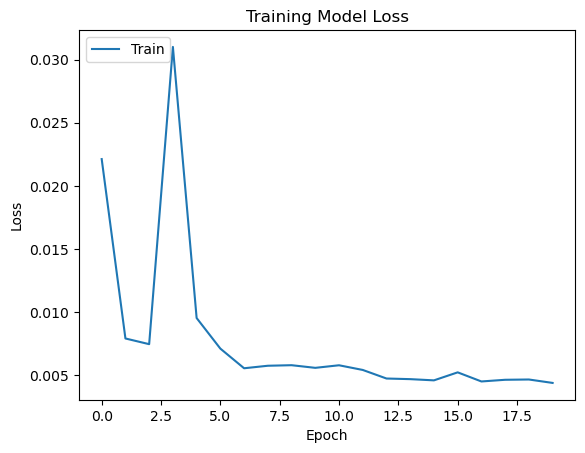

In [48]:
# Plot training loss
plt.plot(hist.history['loss'])
plt.title('Training Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [49]:
# Test the LSTM model
testData = pd.read_csv('C:\\Users\\Asus\\Downloads\\datasetsandcodefilesstockmarketprediction\\Google_test_data.csv')
testData['Close'] = pd.to_numeric(testData['Close'], errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:, 4:5]
y_test = testData.iloc[60:, 0].values
inputClosing = testData.iloc[:, 0].values
inputClosing_scaled = sc.transform(inputClosing.reshape(-1, 1))

In [50]:
X_test_lstm = []
length = len(testData)
timestep = 60
for i in range(timestep, length):
    X_test_lstm.append(inputClosing_scaled[i-timestep:i, 0])
X_test_lstm = np.array(X_test_lstm)
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

In [51]:
# Make predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)
predicted_price = sc.inverse_transform(y_pred_lstm)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


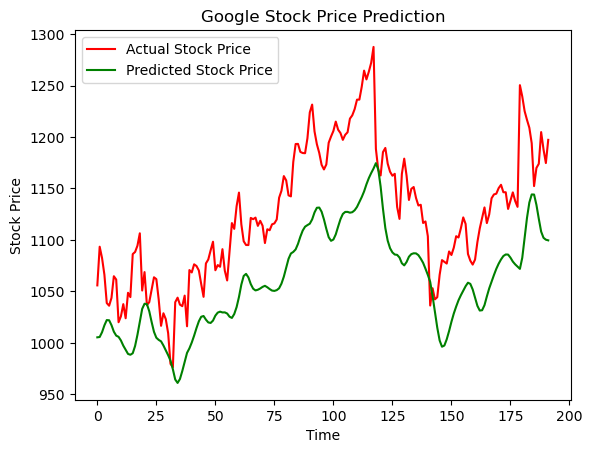

In [52]:
# Plot results
plt.plot(y_test, color='red', label='Actual Stock Price')
plt.plot(predicted_price, color='green', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()